In [16]:
library(tidyverse)
library(tidymodels)
library(ggplot2)

**Data Visualization**

In [2]:
cbb <- read_csv("https://raw.githubusercontent.com/naw333/College-Basketball-Data-Science/main/cbb.csv")
head(cbb,n=3)

Rows: 3523 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (4): TEAM, CONF, POSTSEASON, SEED
dbl (20): G, W, ADJOE, ADJDE, BARTHAG, EFG_O, EFG_D, TOR, TORD, ORB, DRB, FT...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,⋯,FTRD,2P_O,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,⋯,30.4,53.9,44.6,32.7,36.2,71.7,8.6,2ND,1,2016
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,⋯,22.4,54.8,44.7,36.5,37.5,59.3,11.3,2ND,1,2015
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,⋯,30.0,54.7,46.8,35.2,33.2,65.9,6.9,2ND,3,2018


In [46]:
cbb_playoff <- cbb |>
    filter(POSTSEASON != "N/A" & POSTSEASON != "R68") |>
    mutate(RESULT64 = ifelse(POSTSEASON == "R64", "Loss", "Win")) |>
    mutate(RESULT32 = ifelse(POSTSEASON == "R32" | POSTSEASON == "R64", "Loss", "Win"))
head(cbb_playoff)

TEAM,CONF,G,W,ADJOE,ADJDE,BARTHAG,EFG_O,EFG_D,TOR,⋯,2P_D,3P_O,3P_D,ADJ_T,WAB,POSTSEASON,SEED,YEAR,RESULT64,RESULT32
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<chr>,<chr>
North Carolina,ACC,40,33,123.3,94.9,0.9531,52.6,48.1,15.4,⋯,44.6,32.7,36.2,71.7,8.6,2ND,1,2016,Win,Win
Wisconsin,B10,40,36,129.1,93.6,0.9758,54.8,47.7,12.4,⋯,44.7,36.5,37.5,59.3,11.3,2ND,1,2015,Win,Win
Michigan,B10,40,33,114.4,90.4,0.9375,53.9,47.7,14.0,⋯,46.8,35.2,33.2,65.9,6.9,2ND,3,2018,Win,Win
Texas Tech,B12,38,31,115.2,85.2,0.9696,53.5,43.0,17.7,⋯,41.9,36.5,29.7,67.5,7.0,2ND,3,2019,Win,Win
Gonzaga,WCC,39,37,117.8,86.3,0.9728,56.6,41.1,16.2,⋯,40.0,38.2,29.0,71.5,7.7,2ND,1,2017,Win,Win
Kentucky,SEC,40,29,117.2,96.2,0.9062,49.9,46.0,18.1,⋯,44.9,33.2,32.2,65.9,3.9,2ND,8,2014,Win,Win


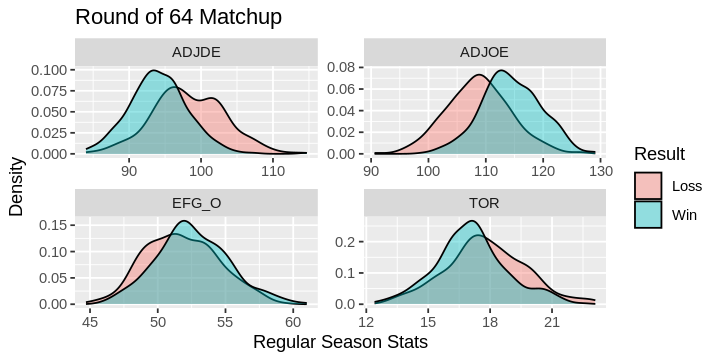

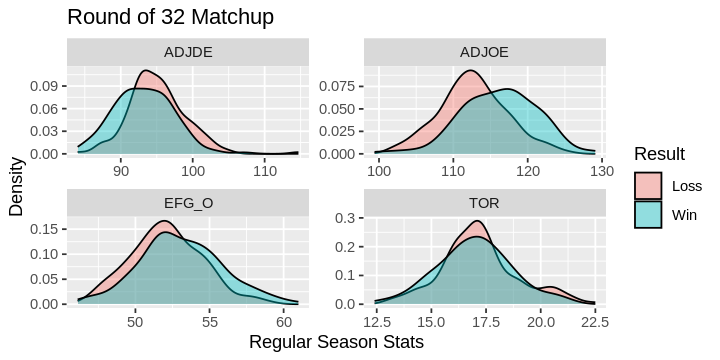

In [50]:
options(repr.plot.height = 3, repr.plot.width = 6)

cbb_r64 <- cbb_playoff |>
    select(ADJOE, ADJDE, EFG_O, TOR, RESULT64)

cbb_r64 |>
    pivot_longer(cols = -RESULT64, names_to = "category", values_to = "value") |>
ggplot(aes(x = value, fill = RESULT64)) +
    geom_density(alpha = 0.4) +
    facet_wrap(facets = vars(category), scales = "free") +
    labs(title = "Round of 64 Matchup", x = "Regular Season Stats", y = "Density", fill = "Result")

cbb_r32 <- cbb_playoff |>
    filter(POSTSEASON != "R64") |>
    select(ADJOE, ADJDE, EFG_O, TOR, RESULT32)

cbb_r32 |>
    pivot_longer(cols = -RESULT32, names_to = "category", values_to = "value") |>
ggplot(aes(x = value, fill = RESULT32)) +
    geom_density(alpha = 0.4) +
    facet_wrap(facets = vars(category), scales = "free") +
    labs(title = "Round of 32 Matchup", x = "Regular Season Stats", y = "Density", fill = "Result")